<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_10_Spring_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 310 - Lecture 10 

<font face="Chalkboard" color="darkgreen" size=6>Linear Regression and Residuals</font>

## <font color='navy'>Linear vs Non-linear models</font>

This is a linear model in terms of the weights $\beta$: 


$$\large
\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 - \beta_3x_3
$$

An example for what linear in weights means
<font color='green'>
$$\large
\hat{y}(2\beta+3\alpha) = 2\hat{y}(\beta)+3\hat{y}(\alpha)
$$</font>

The following is a non-linear model in terms of the weights:


$$\large
\hat{y} = \beta_0 + \beta_1^3x_1 + \frac{1}{\beta_2+\beta_3}x_2 - e^{\beta_3}x_3
$$

<font color='magenta'>
$$\large
\hat{y}(2\beta+3\alpha) \neq 2\hat{y}(\beta)+3\hat{y}(\alpha)
$$</font>

The main point of linear regression is to assume that predictions can ben made by using a linear combination of the features. 

For example, if the data from each feature is $\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix}$, $\begin{bmatrix}
           x_{12} \\
           x_{22} \\
           \vdots \\
           x_{n2}
         \end{bmatrix}$, $...
         \begin{bmatrix}
           x_{1p} \\
           x_{2p} \\
           \vdots \\
           x_{np}
         \end{bmatrix}$ then we assume that the depdendent variable is predicted by a linear combination of these columns populated with features' data. Each column represents a feature and each row an independent observation.

The predicted value is denoted by $\hat{y}$ and 


$$
\hat{y} = \beta_1\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix}
         +
         \beta_2\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix}
                  + ...
         \beta_p\begin{bmatrix}
           x_{1p} \\
           x_{2p} \\
           \vdots \\
           x_{np}
         \end{bmatrix}
$$

##<font color='navy'> The Distribution of Residuals </font>

<font color='darkpink'>Ideally we would like to see that the distribution of the residuals is following a normal distribution (bell shaped).</font>

Critical Thinking: How can we check this?


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
# to accomodate "nice" plots for high resolution displays
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### We consider simulating data for linear regression (design a Monte Carlo Simulation)

In [ ]:
n = 200
x = 11*np.random.random(n)
# how the output relates with the input
y = x*1.5 + 1 + 2*np.random.randn(n)
# we make x to be a column vector
x = x.reshape(-1,1)

In [ ]:
x.shape

(200, 1)

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [ ]:
model.coef_ ,lm.intercept_

(array([1.47889447]), 1.1721400394380623)

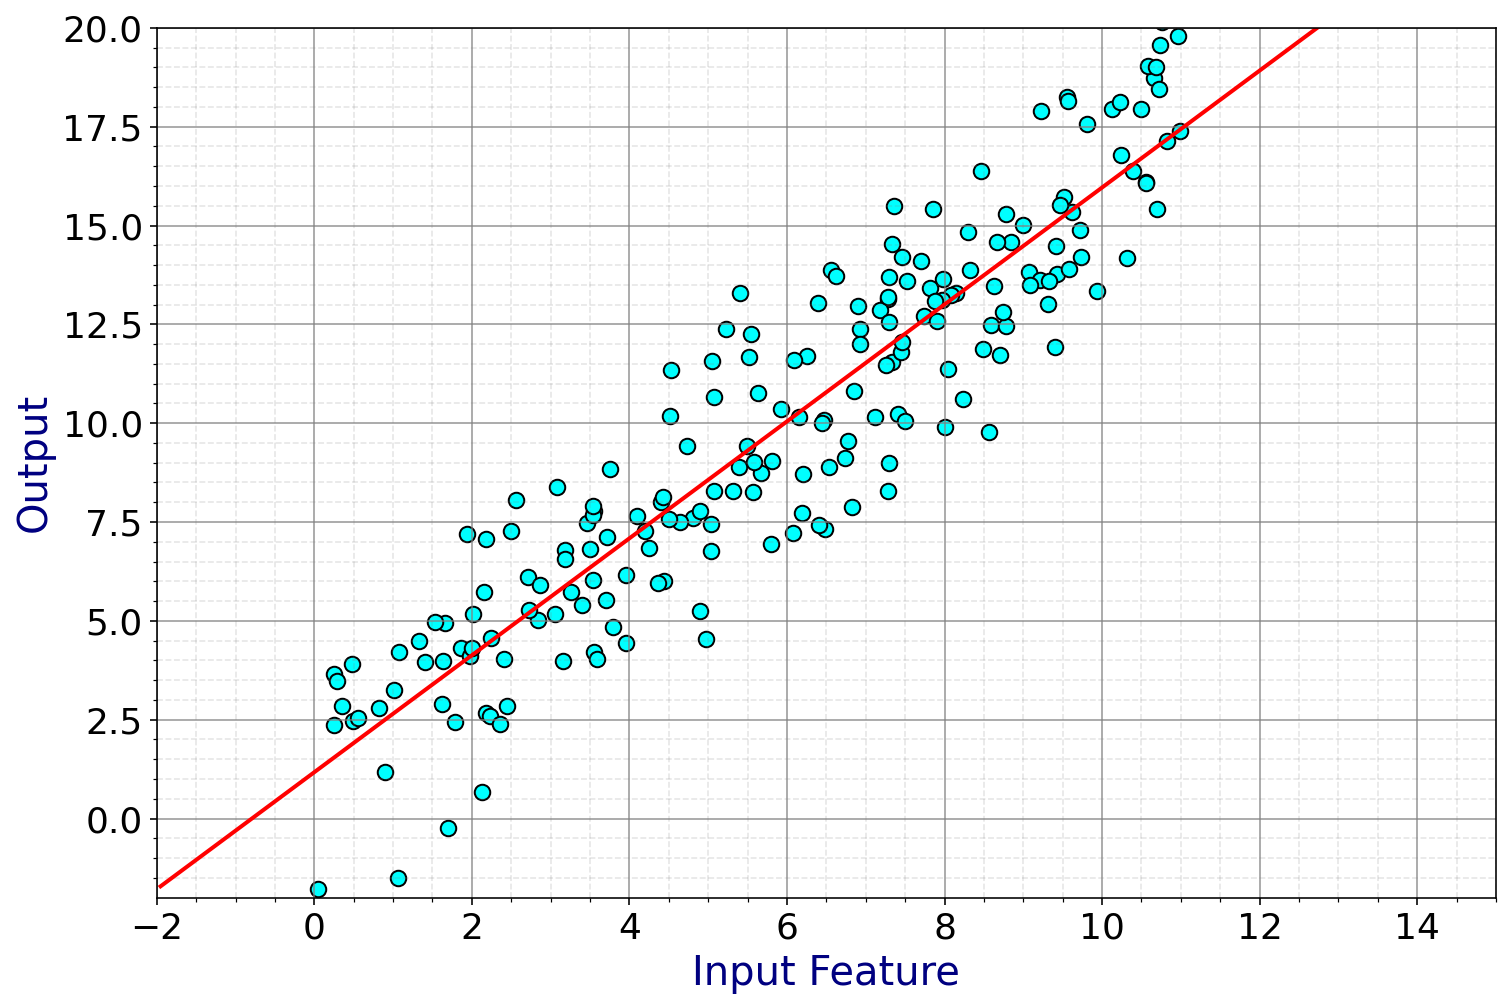

In [ ]:
x_range = np.arange(np.min(x)-2,np.max(x)+3)
yhat = lm.predict(x_range.reshape(-1,1))
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x,y,color='cyan',edgecolors='k',s=60)
ax.plot(x_range, yhat, '-',color='red',lw=2)
ax.set_xlim(-2, 15)
ax.set_ylim(-2, 20)
ax.set_xlabel('Input Feature',fontsize=20,color='navy')
ax.set_ylabel('Output',fontsize=20,color='navy')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.tick_params(axis='x', colors='black',labelsize=18)
plt.tick_params(axis='y', colors='black',labelsize=18)
ax.minorticks_on()
plt.show()

Now let's inspect the residuals.

In [ ]:
residuals = (y - model.predict(x))

In [ ]:
residuals

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Residuals')]

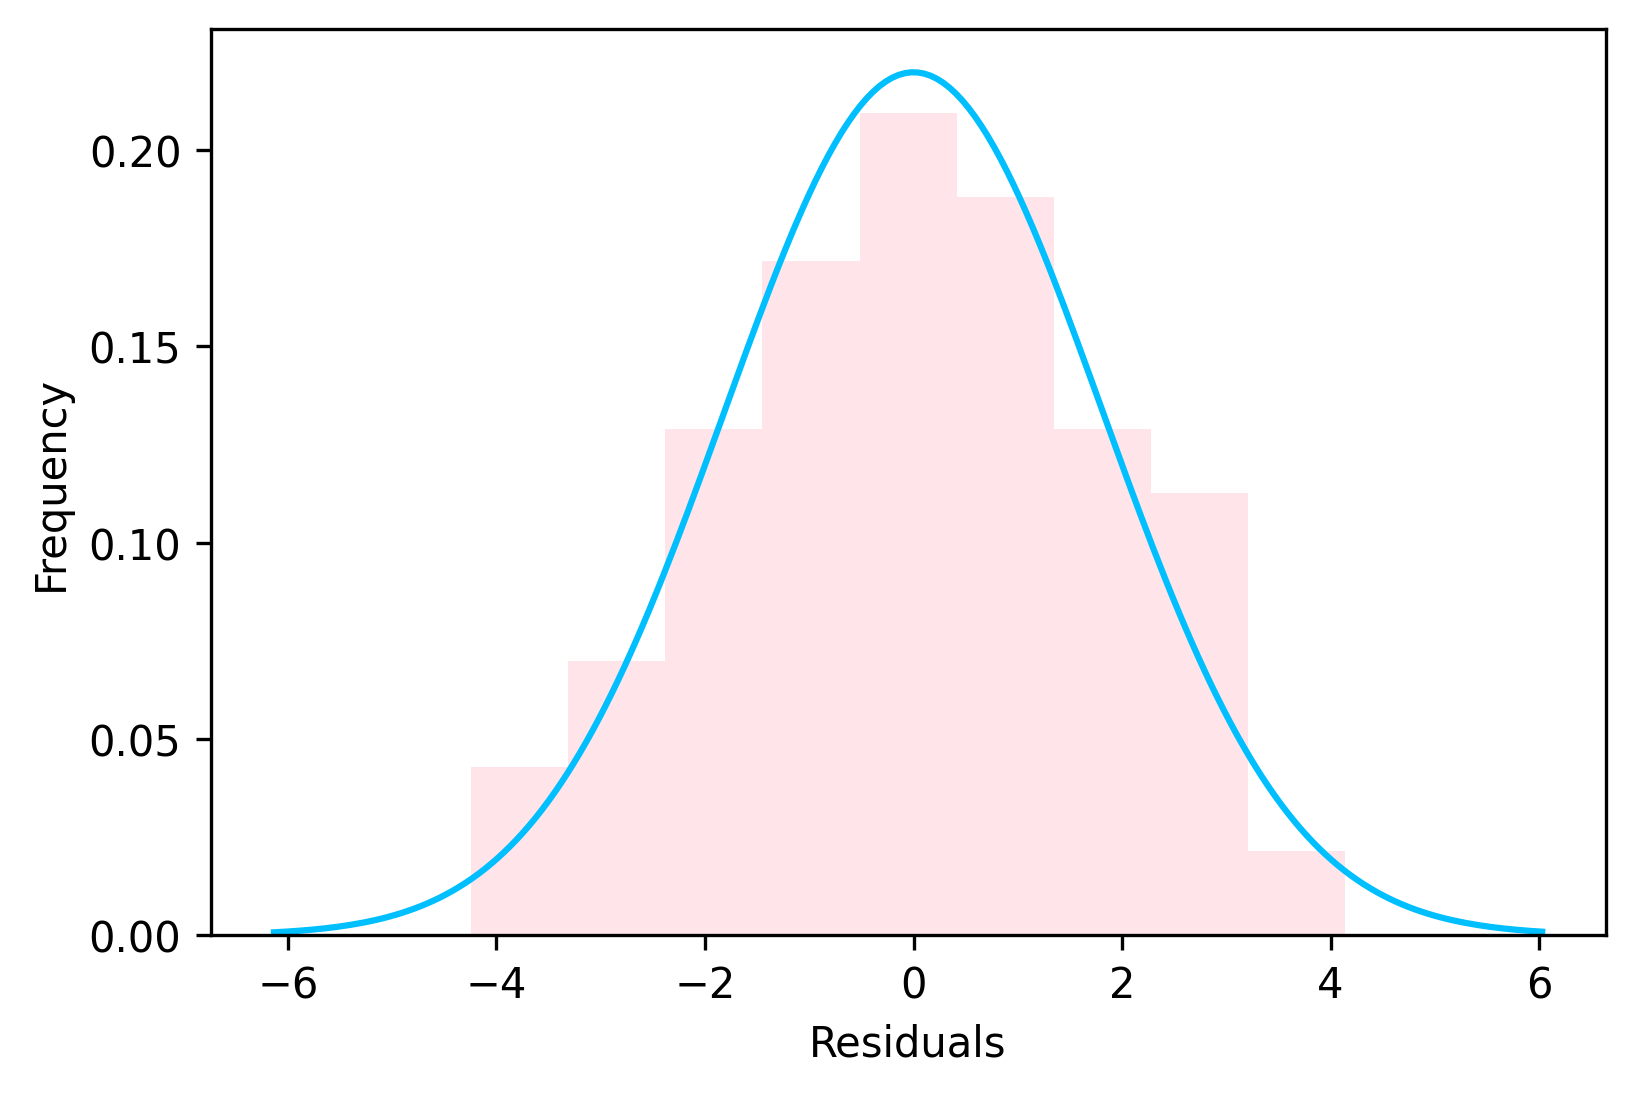

In [ ]:
# this library (seaborn) makes the coding very easy
import seaborn as sns
#sns.set(color_codes=True)
 
# import uniform distribution
from scipy import stats
from scipy.stats import norm

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

# helping to display both the histogram and the underlying distribution
ax1 = sns.distplot(residuals,                                       
                  bins=9,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'pink'},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue'})
ax1.set(xlabel='Residuals', ylabel='Frequency')

In [ ]:
stat, p = stats.shapiro(residuals)
print('The p-value is: '+str(p))

The p-value is: 0.13419245183467865


Next project: learn about Quantile-Quantile plots. Scale the residuals by quantiles and then plot the residual quantiles vs the theoretical quantiles of a normal distribution. If we compute the correlation between the sets of quantiles we get a number between -1 and 1 AND we hope that this is as close to 1 as possible. 

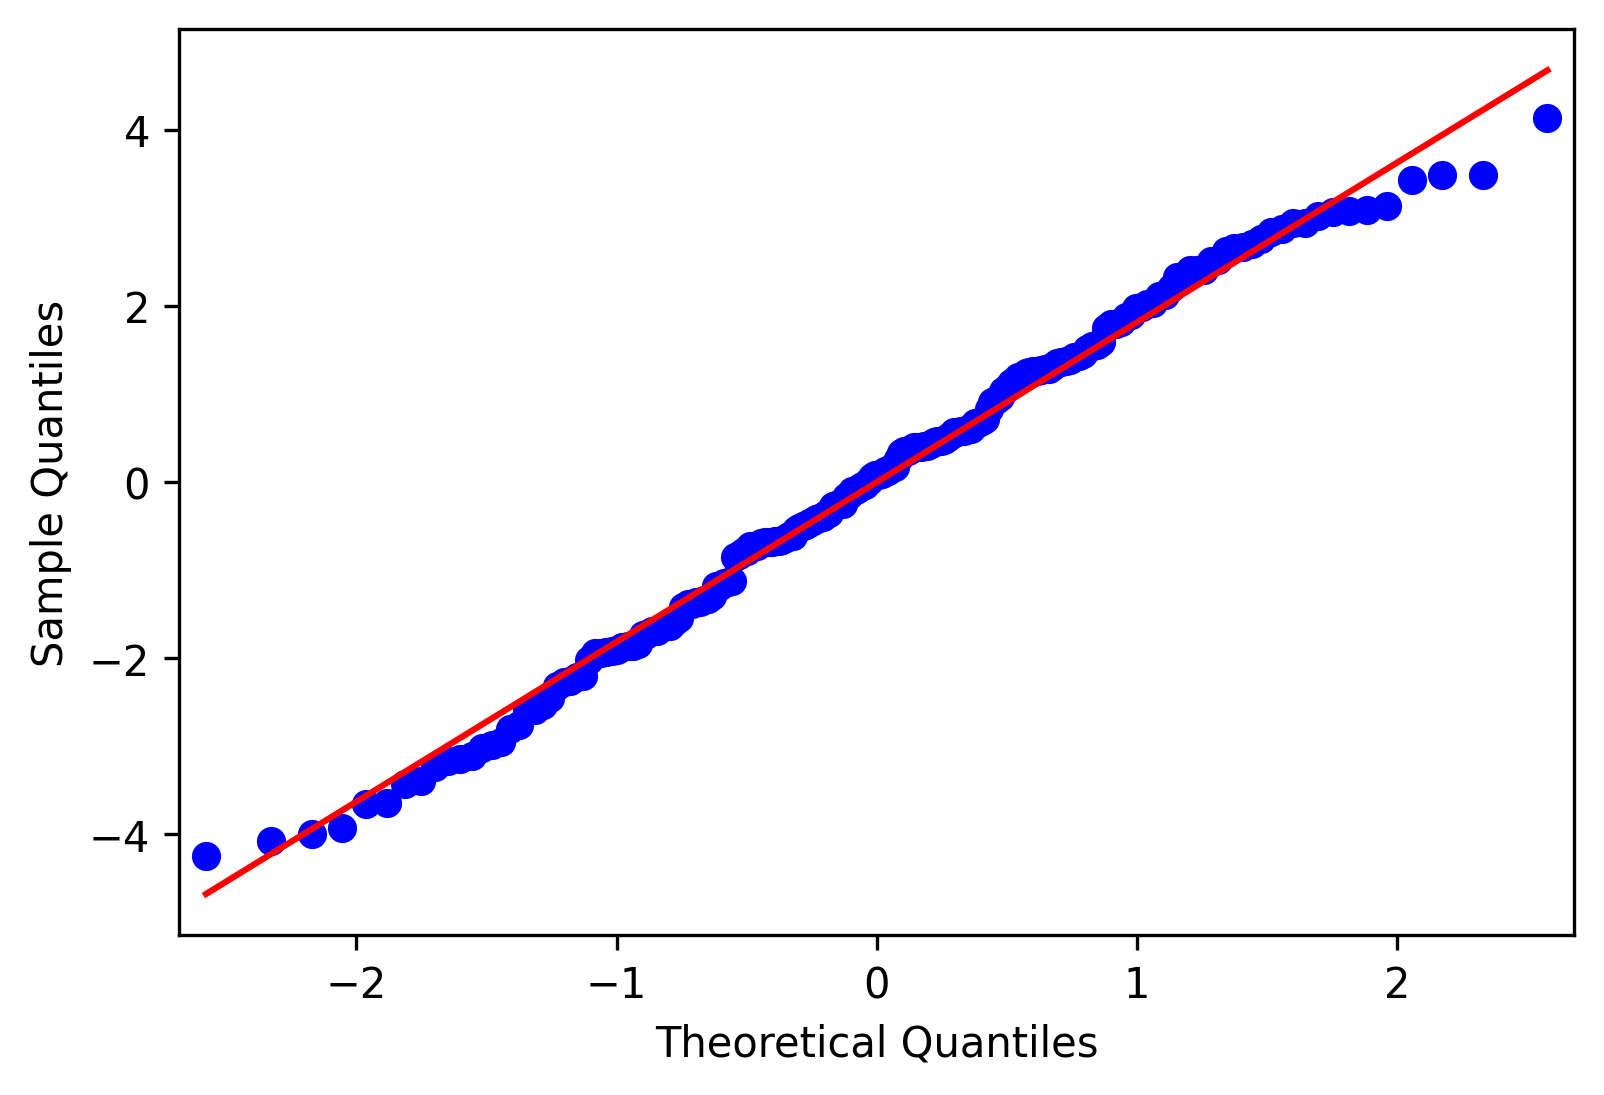

In [ ]:
import pylab
import statsmodels.api as sm
sm.qqplot(residuals, loc = 0, scale = 1, line='s')
pylab.show()

### The Yellowbrick library

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


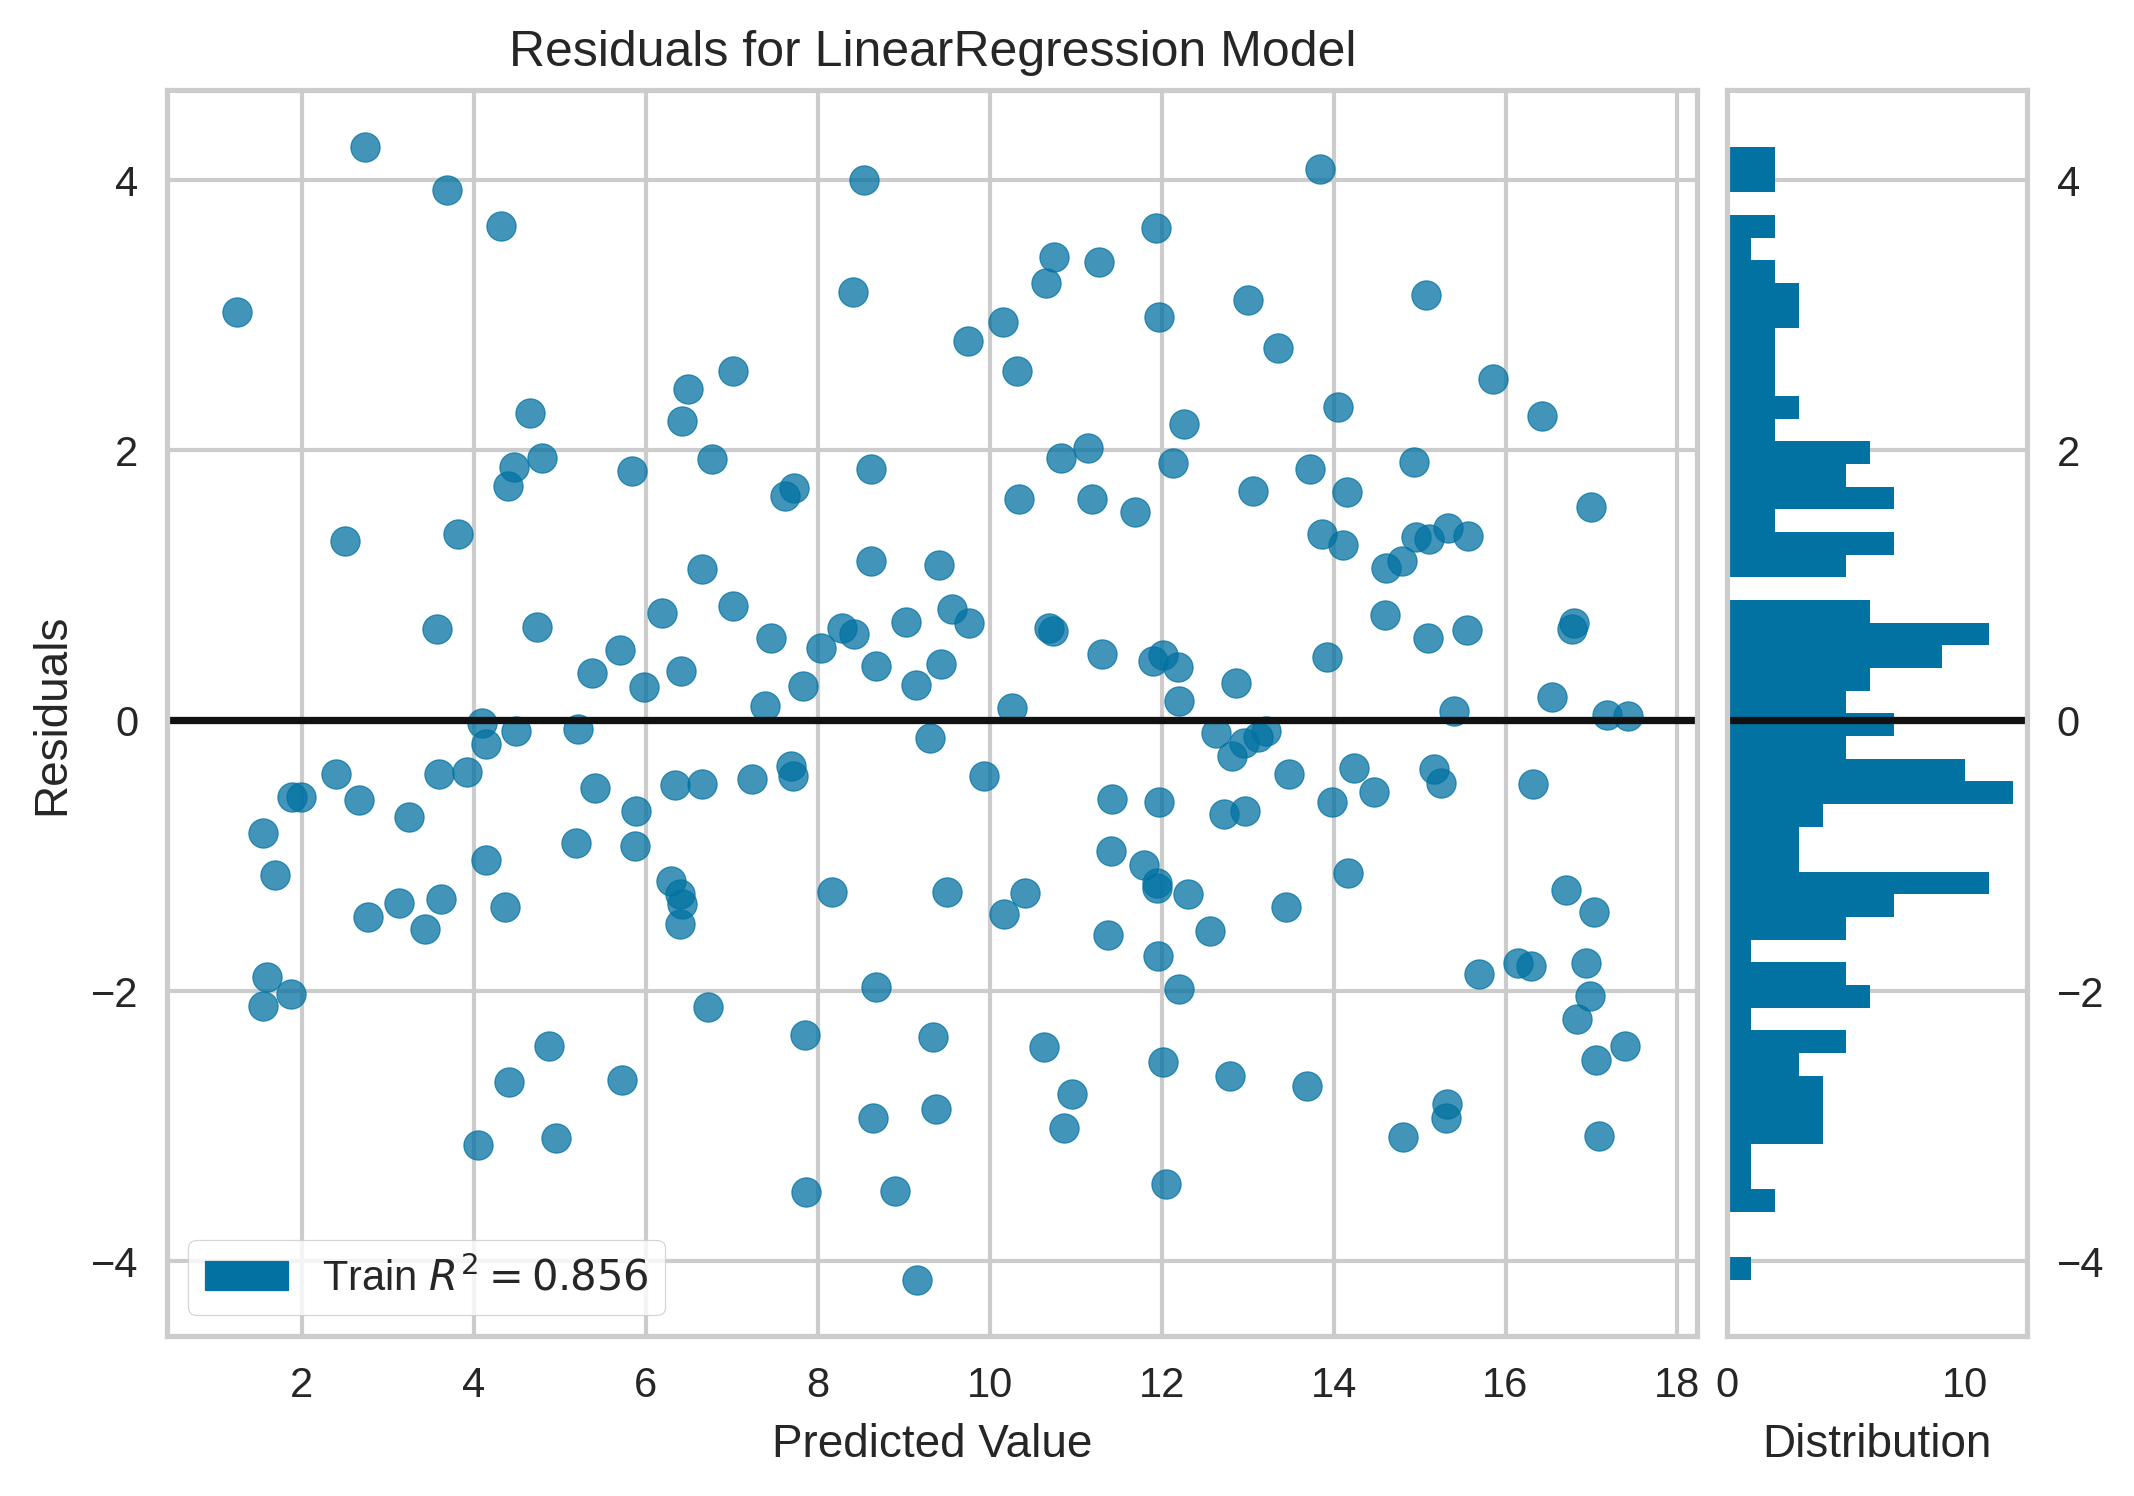

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(x.reshape((-1,1)),y)
visualizer.poof()
plt.show()

## Multiple linear regression

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

In [ ]:
data = load_boston()
df = pd.DataFrame(data=data.data,columns=data.feature_names)

In [ ]:
df.shape

(506, 13)

In [ ]:
y  = data.target

In [ ]:
y

In [ ]:
model = lm.fit(df.values,y)

In [ ]:
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [ ]:
residuals = (y - model.predict(df.values))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Residuals')]

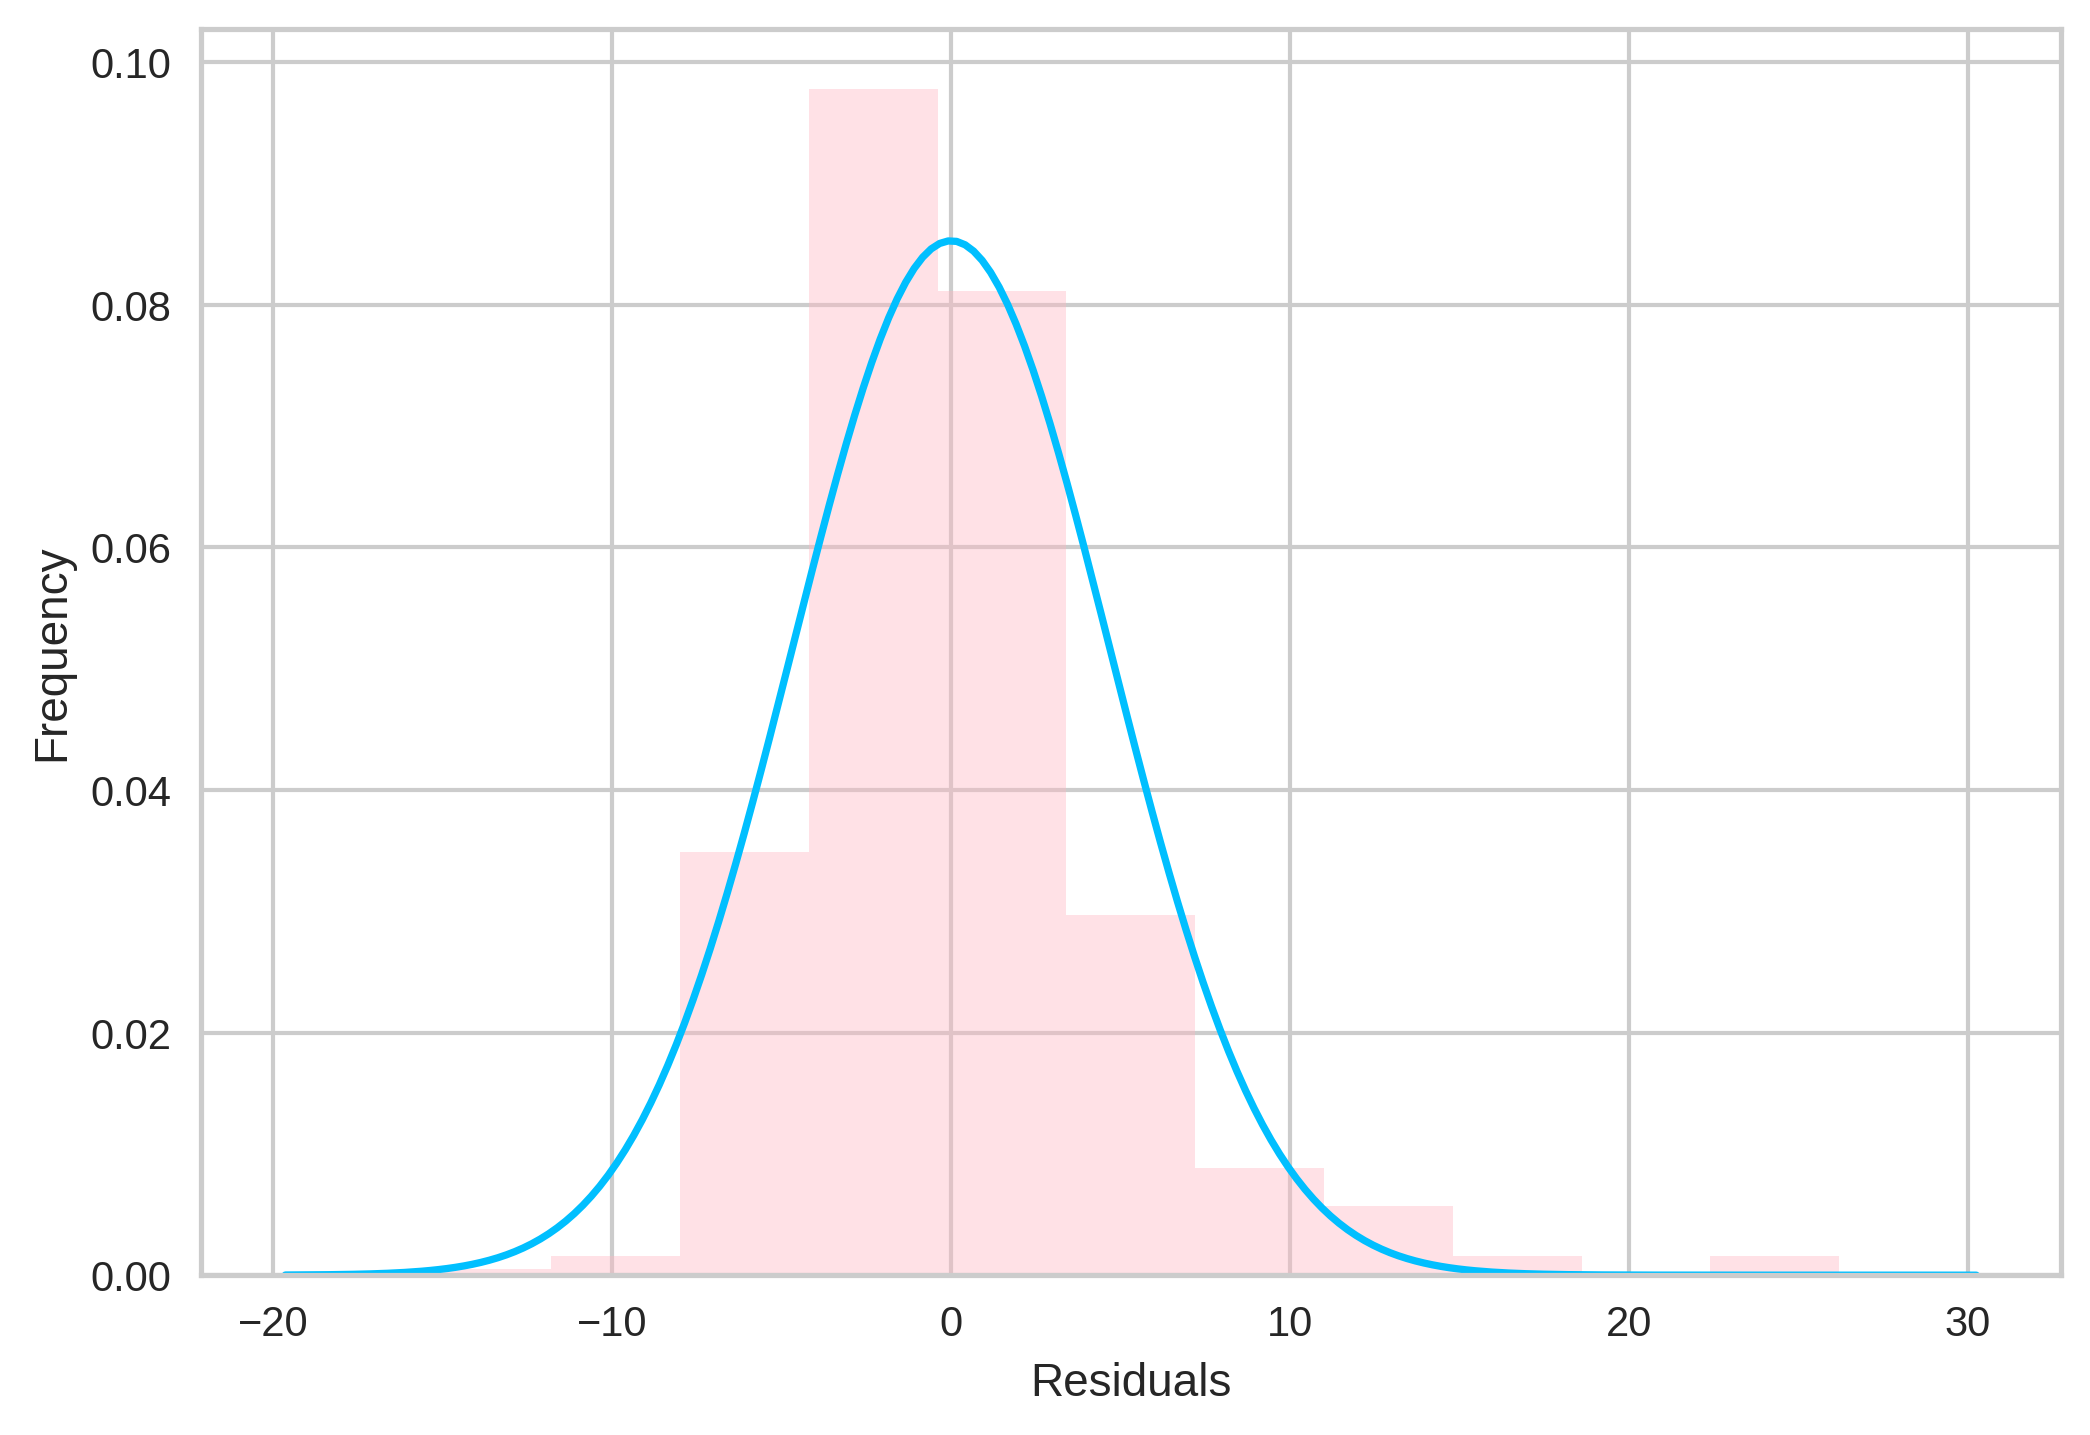

In [ ]:
ax1 = sns.distplot(residuals,
                                        
                  bins=11,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue'})
ax1.set(xlabel='Residuals', ylabel='Frequency')

In [ ]:
stat, p = stats.shapiro(residuals)
print('The p-value is: '+str(p))

The p-value is: 1.480129525706051e-17


## When OLS may not work

Plain *vanilla* multiple linear regression (OLS) fails if the number of observations is smaller than the number of features.


Example: If the dependent variable is the Sales Price, we cannot uniquely determine the weights for the features if we have only 4 observations.


    Dist to School     Property Area       Housing Area         Value       Property Tax     Bathrooms   Sales Price   
------------------  ----------------      -------------      --------      -------------   -----------  ------------
              7.0               0.4               1800           234                9.8            2.0         267.5
              2.3               0.8               1980           244               10.5            2.5         278.2
              4.3               1.1               2120           252               16.2            3.0         284.5
              3.8               0.6               2500           280               18.4            3.5         310.4
              

In [ ]:
df1 = pd.read_csv('dat.csv')

In [ ]:
Xf = df1.values
X = Xf[:,0:6]
y = Xf[:,-1]

In [ ]:
model1 = lm.fit(X,y)

In [ ]:
model1.coef_

array([ 0.05403601, -0.08762454,  0.03884158,  0.43500068, -0.46942783,
       -0.04774555])

## <font color='blue'>A solution for rank defficient Multiple Linear Regression: Regularization</font>

###<font color='darkviolet'> Main Idea: minimize the sum of the square residuals plus a constraint on the vector of weights</font>
The Ridge model (also known as the *Tikhonov regularization*) consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \sum\limits_{j=1}^{p}\beta_j^2$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to 

$$
 \sum\limits_{j=1}^{p}\beta_j^2 < M
$$

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset, i.e. https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
df = pd.read_csv('drive/MyDrive/Colab Notebooks/concrete.csv')
# we get the input and the output as numerical arrays
y = df['strength'].values
X = df.loc[ : , df.columns != 'strength'].values

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [ ]:
X

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

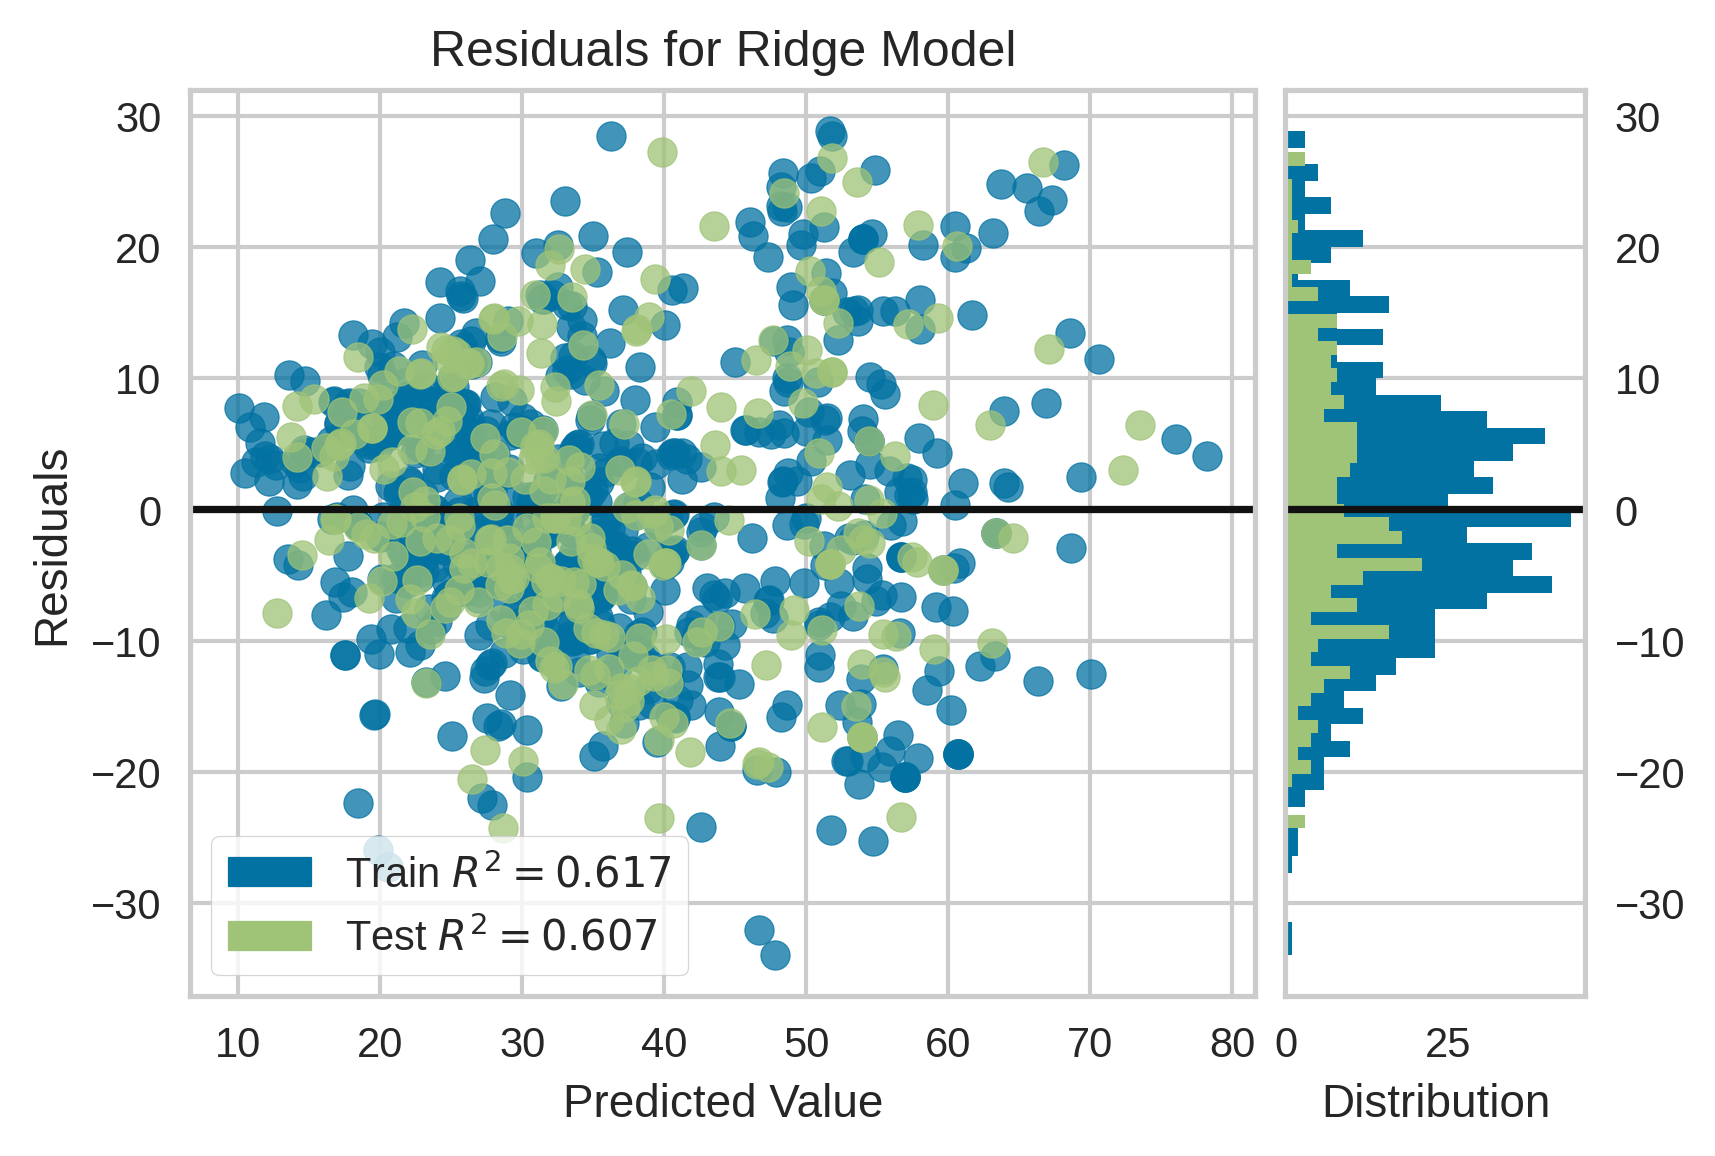

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

# Instantiate the linear model and visualizer
model = Ridge(alpha=0.01)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

In [ ]:
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [ ]:
import seaborn as sns
sns.set(color_codes=True)
 
# import uniform distribution
from scipy import stats
from scipy.stats import norm

In [ ]:
model.predict(X)

array([54.7201059 , 54.89209569, 55.39610147, ..., 26.39890651,
       29.07850384, 31.76986394])

In [ ]:
residuals = y - model.predict(X)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Residuals')]

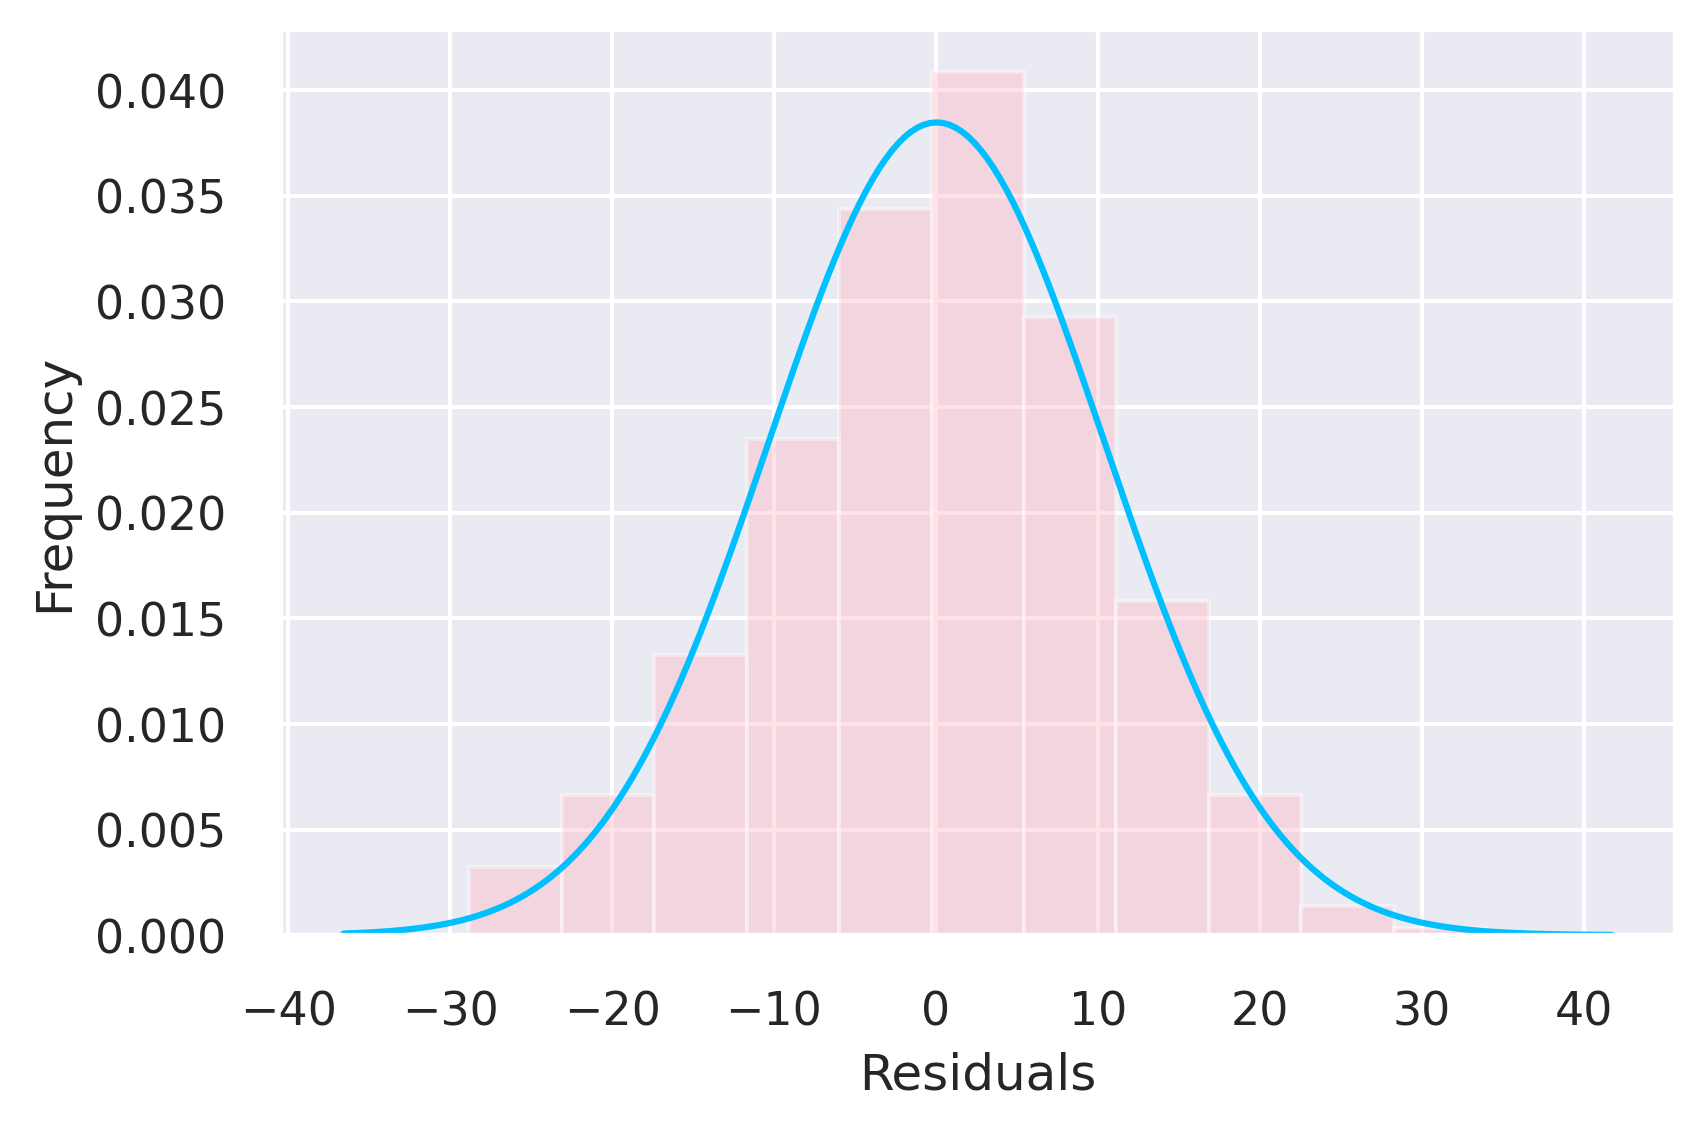

In [ ]:
ax1 = sns.distplot(residuals,                                       
                  bins=11,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue'})
ax1.set(xlabel='Residuals', ylabel='Frequency')

In [ ]:
stat, p = stats.shapiro(residuals)
print('The p-value is: '+str(p))

The p-value is: 0.012440890073776245


## Quantile Plot (Q-Q plot)

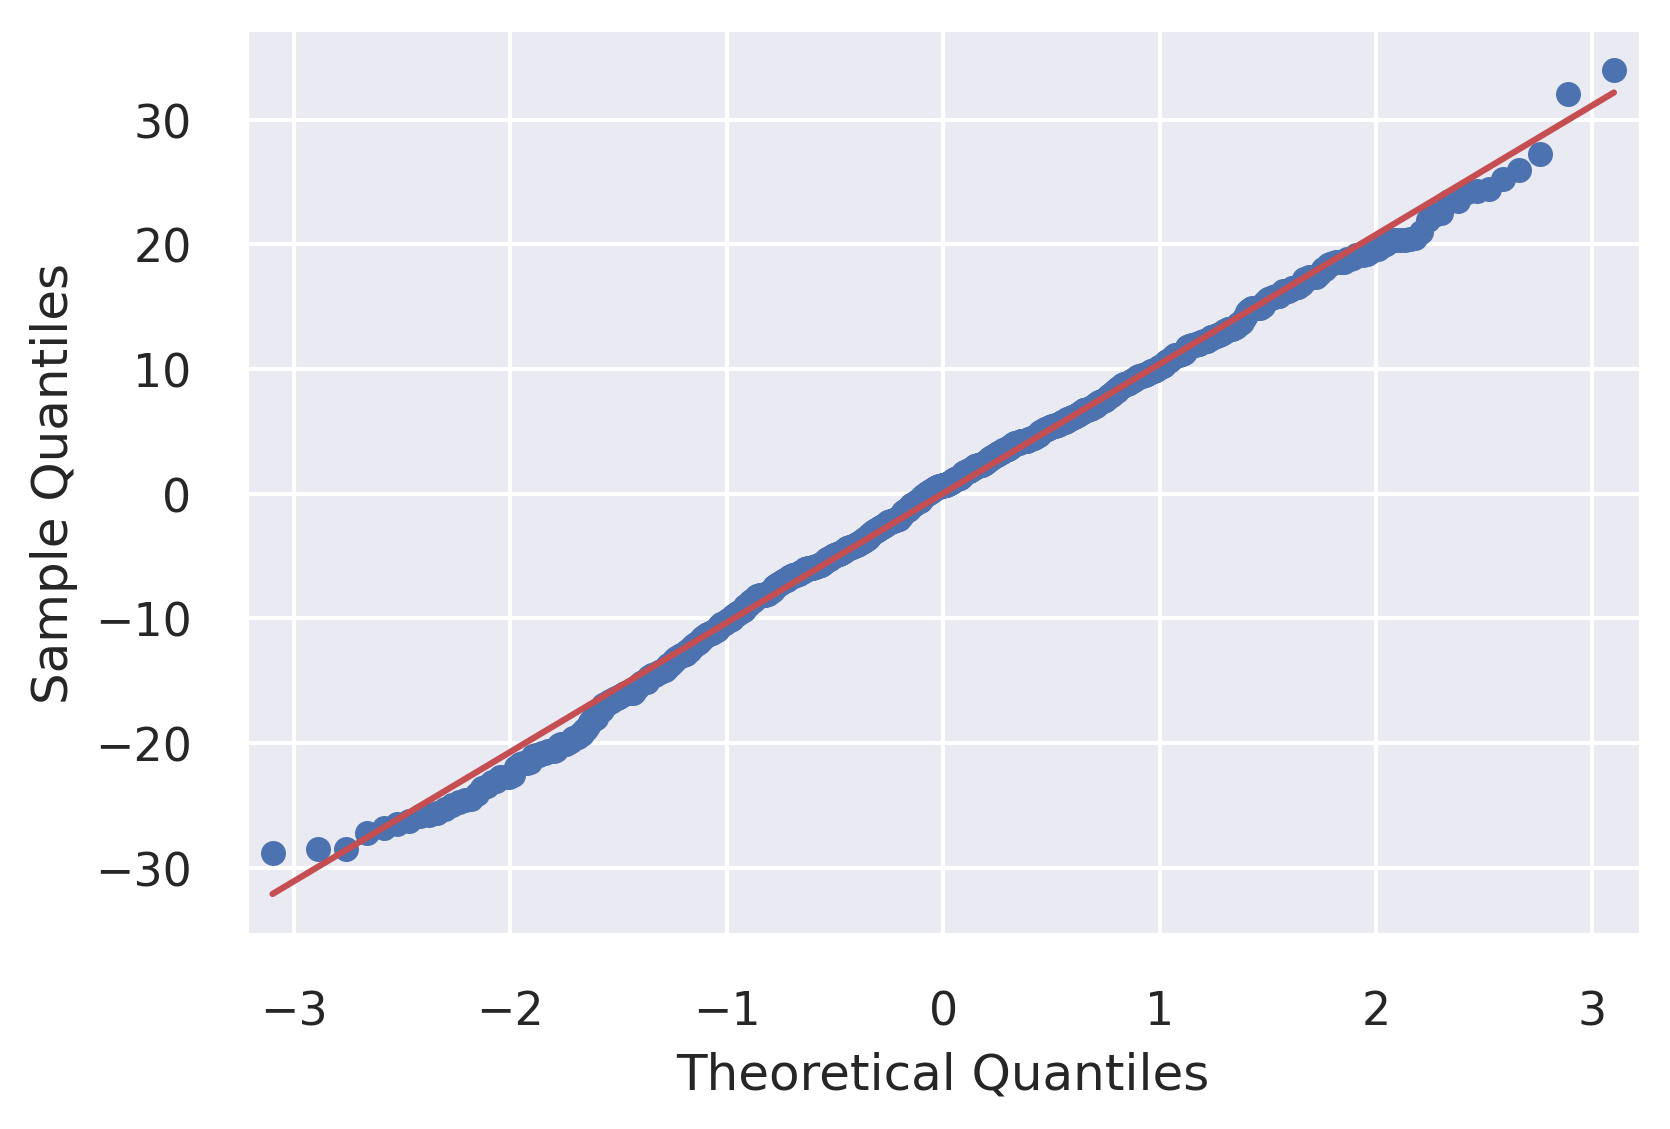

In [ ]:
import pylab
import statsmodels.api as sm
sm.qqplot(residuals, loc = 0, scale = 1, line='s')
pylab.show()